In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
import os
import cv2
import numpy as np

data = []
labels = []
img_size = 128
data_dir = "C:/Users/Timothy/breast cancer/training/jpeg1"

for category in os.listdir(data_dir):
    path = os.path.join(data_dir, category)
    
    if not os.path.isdir(path):
        continue  # Skip files like Info.txt

    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        img_array = cv2.imread(img_path)

        if img_array is not None:
            img_array = cv2.resize(img_array, (img_size, img_size))
            data.append(img_array)
            labels.append(category)

data = np.array(data) / 255.0
labels = np.array(labels)
print(f"Loaded: {len(data)} images")
print("Classes:", np.unique(labels))

Loaded: 5000 images
Classes: ['Benign' 'Malignant']


In [3]:
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)
labels_cat = to_categorical(labels_encoded)

X_train, X_test, y_train, y_test = train_test_split(data, labels_cat, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (4000, 128, 128, 3)
Test shape: (1000, 128, 128, 3)


In [4]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(np.unique(labels)), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

C:\Users\Timothy\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,392,578 (28.20 MB)

 Trainable params: 7,392,578 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 193ms/step - accuracy: 0.9966 - loss: 0.0133 - val_accuracy: 0.5050 - val_loss: 6.2970
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 179ms/step - accuracy: 0.9979 - loss: 0.0076 - val_accuracy: 0.5088 - val_loss: 5.9824
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 181ms/step - accuracy: 0.9952 - loss: 0.0232 - val_accuracy: 0.5113 - val_loss: 5.7551
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 194ms/step - accuracy: 0.9983 - loss: 0.0040 - val_accuracy: 0.5238 - val_loss: 6.2796
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 192ms/step - accuracy: 0.9958 - loss: 0.0076 - val_accuracy: 0.5150 - val_loss: 6.2784
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 184ms/step - accuracy: 0.9969 - loss: 0.0089 - val_accuracy: 0.5213 - val_loss: 6.6380
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 181ms/step - accuracy: 0.9958 - loss: 0.0064 - val_accuracy: 0.5225 - val_loss: 6.7128
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 181ms/step - accuracy: 0.9993 - loss: 0

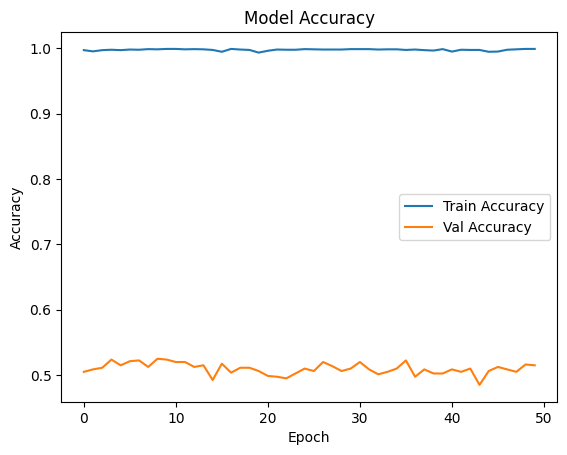

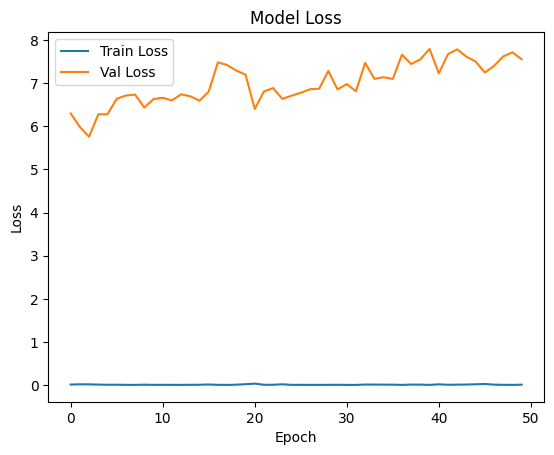

In [22]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [23]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.5125 - loss: 6.7943
Test Accuracy: 49.10%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


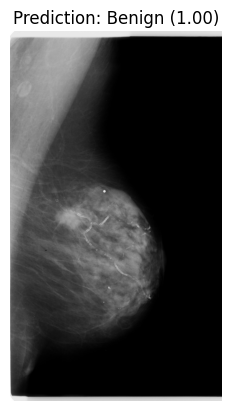

In [24]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

def predict_image(img_path):
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img, (128, 128))
    img_input = np.expand_dims(img_resized / 255.0, axis=0)

    prediction = model.predict(img_input)
    index = np.argmax(prediction)
    class_name = le.classes_[index]
    confidence = prediction[0][index]

    # Display image with prediction
    plt.imshow(img_rgb)
    plt.title(f"Prediction: {class_name} ({confidence:.2f})")
    plt.axis('off')
    plt.show()



predict_image( r"C:\Users\Timothy\breast cancer\training\jpeg1\Benign\proj.jpg")

In [25]:
model.save("breast_cancer_model.keras")

# Save label encoder
import pickle
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)

In [26]:
from tensorflow.keras.models import load_model
import pickle

# Load model and encoder
model = load_model("breast_cancer_model.keras")
with open("label_encoder.pkl", "rb") as f:
    le = pickle.load(f)

print("Model and label encoder loaded successfully.")

Model and label encoder loaded successfully.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


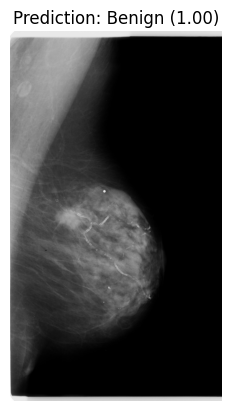

In [27]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def predict_image(img_path):
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img, (128, 128))
    img_input = np.expand_dims(img_resized / 255.0, axis=0)

    prediction = model.predict(img_input)
    index = np.argmax(prediction)
    class_name = le.classes_[index]
    confidence = prediction[0][index]
    

    # Show prediction
    plt.imshow(img_rgb)
    plt.title(f"Prediction: {class_name} ({confidence:.2f})")
    plt.axis('off')
    plt.show()

# Example test
predict_image( r"C:\Users\Timothy\breast cancer\training\jpeg1\Benign\proj.jpg")

In [28]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import f1_score, classification_report
import pickle

# 📌 Load your model and label encoder
model = load_model("breast_cancer_model.keras")
le = pickle.load(open("label_encoder.pkl", "rb"))

# 📂 Load test images from directory
test_dir = 'C:/Users/Timothy/breast cancer/training/jpeg1'  # <-- change this to your actual test folder

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),   # change if your model uses a different input size
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)
# 🎯 True labels
y_true = test_generator.classes

# 🤖 Predict
y_pred_probs = model.predict(test_generator, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)

# 🧮 F1 Score and report
f1 = f1_score(y_true, y_pred, average='weighted')
print(f"\nF1 Score: {f1:.4f}\n")

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

Found 5000 images belonging to 2 classes.


C:\Users\Timothy\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


157/157 ━━━━━━━━━━━━━━━━━━━━ 183s 1s/step

F1 Score: 0.8187

Classification Report:
              precision    recall  f1-score   support

      Benign       0.81      0.84      0.82      2524
   Malignant       0.83      0.80      0.81      2476

    accuracy                           0.82      5000
   macro avg       0.82      0.82      0.82      5000
weighted avg       0.82      0.82      0.82      5000



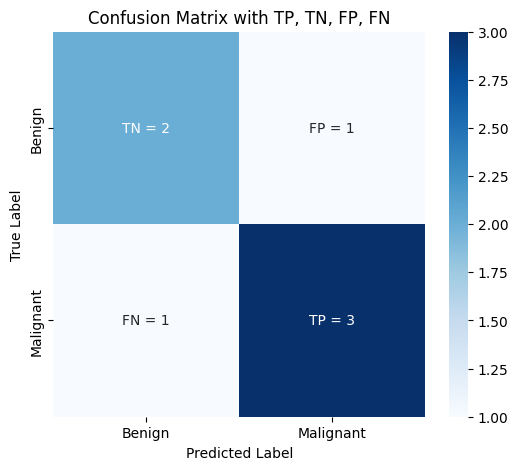

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Example data
y_true = [0, 1, 1, 0, 1, 0, 1]  # Ground truth
y_pred = [0, 1, 0, 0, 1, 1, 1]  # Model predictions

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Extract values
tn, fp, fn, tp = cm.ravel()

# Annotated matrix
labels = [
    [f"TN = {tn}", f"FP = {fp}"],
    [f"FN = {fn}", f"TP = {tp}"]
]

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=labels, fmt="", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix with TP, TN, FP, FN")
plt.show()
